In [ ]:
Dataset available on Kaggle.com

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 38s 3us/step


In [ ]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


#### Starting from 5, take every 6th, that is ever hour , original df has 10 mins interval

In [ ]:
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


#### Convert to pandas datetime

In [ ]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


We are going to focus on T(degC) column

#### Ploting the time series

<AxesSubplot:xlabel='Date Time'>

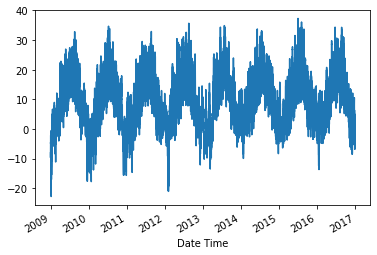

In [ ]:
temp = df['T (degC)']
temp.plot()

#### Making each row a matrix input

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6], take last five to predict the 6th,,,, 1-5 is appended to X, 6 to y
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70086, 5, 1), (70086,))

#### Splitting the model

In [ ]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


#### To specify our model copacks

In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

#### Fit the model

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Loss, RMSE and validation loss(which is the most important)all decreased, and the model was saved at 0.4981 which was the lowest

In [ ]:
# Load the model with the lowest validation loss to memory
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

#### Predictions

On the training data

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,-9.906666,-9.67
1,-9.727455,-9.17
2,-8.853756,-8.10
3,-7.395447,-7.66
4,-7.282683,-7.04
...,...,...
59995,6.171422,6.07
59996,7.092844,9.88
59997,12.444750,13.53
59998,15.767424,15.43


#### Plotting

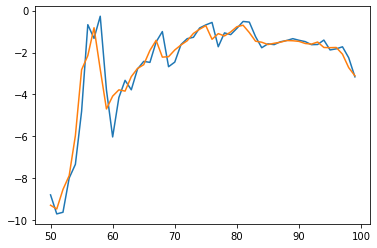

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

#### Lets see how it did on the validation data

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,15.656652,14.02
1,13.395706,13.67
2,13.040318,12.27
3,11.529448,11.19
4,10.444004,10.85
...,...,...
4995,17.237844,18.27
4996,17.293936,17.85
4997,17.213144,16.65
4998,15.841560,15.85


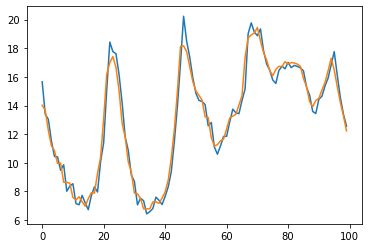

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

#### and on the test dataset

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,14.411085,13.99
1,13.279018,13.46
2,12.904291,12.93
3,12.515144,12.43
4,12.071917,12.17
...,...,...
5081,-1.307995,-0.98
5082,-1.664353,-1.40
5083,-1.681770,-2.75
5084,-3.347732,-2.89


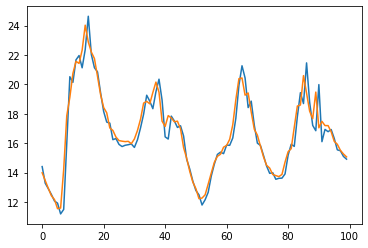

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

# Part 2

### Multivariate time series analysis

#### Plotting actual and predictions

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0       14.411085    13.99
 1       13.279018    13.46
 2       12.904291    12.93
 3       12.515144    12.43
 4       12.071917    12.17
 ...           ...      ...
 5081    -1.307995    -0.98
 5082    -1.664353    -1.40
 5083    -1.681770    -2.75
 5084    -3.347732    -2.89
 5085    -3.237491    -3.93
 
 [5086 rows x 2 columns],
 0.6299121544763693)

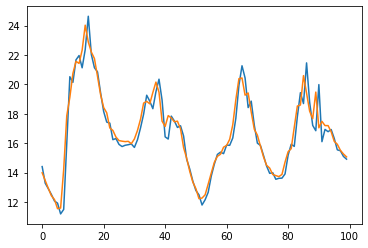

In [ ]:
plot_predictions1(model1, X_test1, y_test1)

#### Making a convolutional neural network model

In [ ]:
model2 = Sequential()
model2.add(InputLayer((5, 1))) #window length, we chose 5 hrs   # Kernel is also window
model2.add(Conv1D(64, kernel_size=2)) #replace LSTM with Conv1D which is the sliding window( how many windows do we want to slide accross this, which is gonna be 64)
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4, 64)             192       
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 2056      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


#### Taking the check point code

In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

#### Fitting model2

In [ ]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 5.6315 - root_mean_squared_error: 2.3731 - val_loss: 0.9048 - val_root_mean_squared_error: 0.9512
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0054 - root_mean_squared_error: 1.0027 - val_loss: 0.6363 - val_root_mean_squared_error: 0.7977_squared_error: 1.02 - ETA: 2s - loss:
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7612 - root_mean_squared_error: 0.8725 - val_loss: 0.5529 - val_root_mean_squared_error: 0.7436
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6871 - root_mean_squared_error: 0.8289 - val_loss: 0.5040 - val_root_mean_squared_error: 0.7099
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6723 - root_mean_squared_error: 0.8199 - val_loss: 0.5171 - val_root_mean_squared_error: 0.7191
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6643 - root_mean_squared_error: 0.8151 - val_loss: 0.4925 - val_root_mean_squared_error: 0.7018
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6594 - root_mean_squared_error: 0.8121 - val_loss: 0.4993 - val_root_mean_squared_error: 0.7066squared_erro
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6558 - root_mean_squared_error: 0.8098 - val_loss: 0.4877 - val_root_mean_squared_error: 0.6984 - root_mean_squared_error: 0.8 - ETA: 5s - loss: 0.6473 - root_mean_squared_error: 0. - ETA: 4s - loss: 0.6408 - root_me - ETA: 3s - loss: 0.6484 - ro - ETA: 1s - loss: 0.6514 - root_mean_squared_er - ETA: 1s - loss: 0.6527 - root_mea
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6539 - root_mean_squared_error: 0.8086 - val_loss: 0.4954 - val_root_mean_squared_error: 0.7038
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6539 - root_mean_squared_error: 0.8086 - val_loss: 0.4886 - val_root_mean_squared_error: 0.6990


#### Replacing with a GRU,(gated recurrent unit)

In [ ]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 64)                12864     
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 [==============================] - 23s 11ms/step - loss: 37.2708 - root_mean_squared_error: 6.1050 - val_loss: 1.0778 - val_root_mean_squared_error: 1.0382s


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.1261 - root_mean_squared_error: 1.4581 - val_loss: 0.6046 - val_root_mean_squared_error: 0.7776


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.9078 - root_mean_squared_error: 0.9528 - val_loss: 0.5180 - val_root_mean_squared_error: 0.7198


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.7074 - root_mean_squared_error: 0.8411 - val_loss: 0.4981 - val_root_mean_squared_error: 0.7058


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6635 - root_mean_squared_error: 0.8145 - val_loss: 0.4960 - val_root_mean_squared_error: 0.7043


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6501 - root_mean_squared_error: 0.8063 - val_loss: 0.4955 - val_root_mean_squared_error: 0.7039


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6459 - root_mean_squared_error: 0.8037 - val_loss: 0.5005 - val_root_mean_squared_error: 0.7075
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6428 - root_mean_squared_error: 0.8017 - val_loss: 0.4891 - val_root_mean_squared_error: 0.6993


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 9/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6407 - root_mean_squared_error: 0.8004 - val_loss: 0.4992 - val_root_mean_squared_error: 0.7065
Epoch 10/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6388 - root_mean_squared_error: 0.7993 - val_loss: 0.4840 - val_root_mean_squared_error: 0.6957


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


#### Using multiple variables

##### Adding seconds to temperature

In [ ]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [ ]:
day = 60*60*24 # number of seconds in a day
year = 365.2425*day #Year

# Add a new df,converting period signals to sin and cos signals forday and year

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [ ]:
# Now drop seconds since it does not loop around but is ever increasing
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [ ]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [ ]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

#### Carry out standardization to produce normal curve which will require mean and std deviation of temperature for training, validation and testing datasets

In [ ]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [ ]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

#### Make the LSTM model

In [ ]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - 42s 21ms/step - loss: 30.6731 - root_mean_squared_error: 5.5383 - val_loss: 4.2488 - val_root_mean_squared_error: 2.0613uared_error


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 5.7178 - root_mean_squared_error: 2.3912 - val_loss: 2.2293 - val_root_mean_squared_error: 1.4931


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 2.2561 - root_mean_squared_error: 1.5020 - val_loss: 1.0524 - val_root_mean_squared_error: 1.0258


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 1.1228 - root_mean_squared_error: 1.0596 - val_loss: 0.7176 - val_root_mean_squared_error: 0.8471


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.7838 - root_mean_squared_error: 0.8853 - val_loss: 0.5827 - val_root_mean_squared_error: 0.7633


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.6454 - root_mean_squared_error: 0.8033 - val_loss: 0.4828 - val_root_mean_squared_error: 0.694851 - ETA: 6s - loss: 0.6505


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.5757 - root_mean_squared_error: 0.7587 - val_loss: 0.4407 - val_root_mean_squared_error: 0.6638: 0.5801 - root_mean_squared_error:  - ETA: 21s - loss: 0.5791 - root_ - ETA: 3s - loss: 0.5789 - root_mean_sq - ETA: 1s - loss: 0.5782


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 8/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.5482 - root_mean_squared_error: 0.7404 - val_loss: 0.4248 - val_root_mean_squared_error: 0.6518_mean_sq - ETA: 1s - loss: 0.5497 - root_mean_squ


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 9/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.5391 - root_mean_squared_error: 0.7343 - val_loss: 0.4260 - val_root_mean_squared_error: 0.6527382 - root
Epoch 10/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.5324 - root_mean_squared_error: 0.7296 - val_loss: 0.4116 - val_root_mean_squared_error: 0.6416loss: 0.5317 - root_mean_squared_error: 0.72 - ETA: 0s - loss: 0.5317 - root_mean_squared_error: 0.


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


(      Predictions  Actuals
 0       13.235130    13.46
 1       12.866533    12.93
 2       12.489359    12.43
 3       12.208448    12.17
 4       12.324831    11.55
 ...           ...      ...
 5080    -0.976455    -0.98
 5081    -1.349331    -1.40
 5082    -1.598612    -2.75
 5083    -2.904446    -2.89
 5084    -3.041667    -3.93
 
 [5085 rows x 2 columns],
 0.480812779087383)

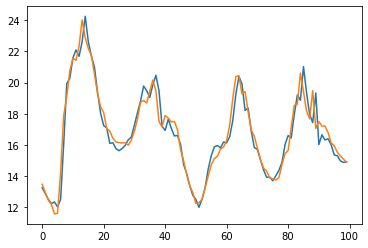

In [ ]:
plot_predictions1(model4, X2_test, y2_test)

#### we are going to add pressure and try to predict it

In [ ]:
# contatenate temperature and pressure
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [ ]:
# window making function
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape   

((70084, 7, 6), (70084, 2))

7 is the no of hrs( window length), 6 is the training variables, 2 is temp and pressure|

In [ ]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

#### Standardizing

In [ ]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

#### Preprocess functions

In [ ]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [ ]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

#### Making a new model

In [ ]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                18176     
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 18        
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - 54s 25ms/step - loss: 0.1540 - root_mean_squared_error: 0.3924 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1837


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0258 - root_mean_squared_error: 0.1606 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1296


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0133 - root_mean_squared_error: 0.1153 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0951


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0089 - root_mean_squared_error: 0.0941 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0822oot_mean_squared_error: 0 - ETA: 3s - los - ETA: 2s - loss: 0.0089 - r - ETA: 0s - loss: 0.0089 - root_mean_sq


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 5/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0071 - root_mean_squared_error: 0.0845 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0735


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0061 - root_mean_squared_error: 0.0782 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0681.0057 - root_mean_squared_error:  - ETA: 7s - loss: 0.0057 - root_m - ETA: 2s - l


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0055 - root_mean_squared_error: 0.0740 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0641


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 8/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0052 - root_mean_squared_error: 0.0719 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0647
Epoch 9/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0623


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 10/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0049 - root_mean_squared_error: 0.0702 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0632


#### Predictions(pressure and temp) and plotting

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.386128,0.412451,-0.776086,-0.793439
1,0.340989,0.353683,-0.766834,-0.763123
2,0.301531,0.323123,-0.732371,-0.721893
3,0.303916,0.250251,-0.677396,-0.652773
4,0.256734,0.254952,-0.590346,-0.652773
...,...,...,...,...
95,0.669964,0.716869,-0.408260,-0.416310
96,0.631958,0.687485,-0.413894,-0.399333
97,0.616451,0.663978,-0.398809,-0.399333
98,0.618502,0.641646,-0.387477,-0.400546


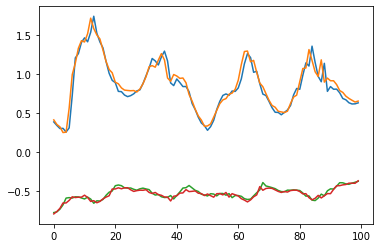

In [ ]:
plot_predictions2(model5, X3_test, y3_test)

#### Post proccessing

In [ ]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.706046,12.93,982.573120,982.43
1,12.321999,12.43,982.649414,982.68
2,11.986294,12.17,982.933655,983.02
3,12.006583,11.55,983.386963,983.59
4,11.605160,11.59,984.104858,983.59
...,...,...,...,...
95,15.120928,15.52,985.606384,985.54
96,14.797569,15.27,985.559937,985.68
97,14.665638,15.07,985.684326,985.68
98,14.683088,14.88,985.777832,985.67


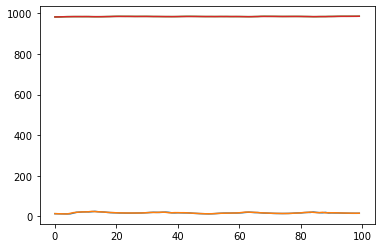

In [ ]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

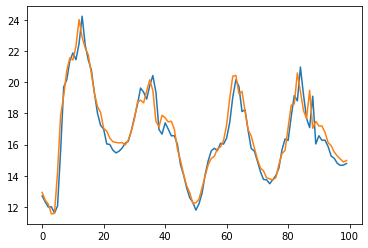

In [ ]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

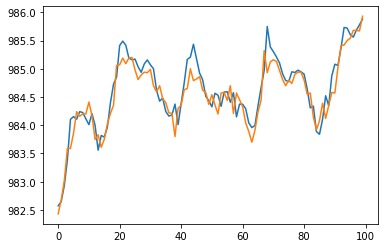

In [ ]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

### Extra few things on TS

In [ ]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 7, 32)             4992      
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 18        
Total params: 30,362
Trainable params: 30,362
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1875/1875 [==============================] - 131s 60ms/step - loss: 0.1487 - root_mean_squared_error: 0.3857 - val_loss: 0.0444 - val_root_mean_squared_error: 0.2107 3s - loss: 0.1520 - root_mean_squared_error:  - ETA: 2s - loss: 0.1516 - root_mean_squared_error: 0.389 - ETA: 2


INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


Epoch 2/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0383 - root_mean_squared_error: 0.1958 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1706 ETA: 5s - loss: 0.0389 - root_mean_squar - ETA: 4s - loss: 0.0387 - root_mean_squar - ETA: 3s - loss: 0.0386 - root_mean_squared_e - ETA:


INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


Epoch 3/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0206 - root_mean_squared_error: 0.1434 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1185


INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


Epoch 4/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0126 - root_mean_squared_error: 0.1124 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0967


INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


Epoch 5/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0098 - root_mean_squared_error: 0.0988 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0879


INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


Epoch 6/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0082 - root_mean_squared_error: 0.0904 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0806


INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


Epoch 7/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0070 - root_mean_squared_error: 0.0836 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0737


INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


Epoch 8/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0061 - root_mean_squared_error: 0.0782 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0682


INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


Epoch 9/10
1875/1875 [==============================] - 112s 59ms/step - loss: 0.0056 - root_mean_squared_error: 0.0747 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0646 1s - loss: 0.0056 - root


INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


Epoch 10/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0053 - root_mean_squared_error: 0.0730 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0636


INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


In [ ]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 6, 64)             832       
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 3080      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 18        
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1150 - root_mean_squared_error: 0.3390 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1493
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0160 - root_mean_squared_error: 0.1263 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1057
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0099 - root_mean_squared_error: 0.0993 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0869
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0078 - root_mean_squared_error: 0.0886 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0780
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0069 - root_mean_squared_error: 0.0834 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0752
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0064 - root_mean_squared_error: 0.0803 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0721
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0061 - root_mean_squared_error: 0.0783 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0693
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0059 - root_mean_squared_error: 0.0767 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0057 - root_mean_squared_error: 0.0757 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0669
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0056 - root_mean_squared_error: 0.0749 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets
